The following is from [this article](https://medium.com/towards-data-science/understanding-predictive-maintenance-wave-data-feature-engineering-part-2-spectral-3eced3bdbb3e) in Medium.

# Frequency-Domain Features

Transitioning to the frequency domain, we employ techniques like the `Fast Fourier Transform (FFT)` to convert time-domain signals. Extracted features include `dominant frequency`, `spectral entropy`, and `spectral kurtosis`. `Power Spectral Density (PSD)` and `Harmonic Ratios` offer insights into power distribution and harmonic relationships.

- `FFT (Fast Fourier Transform)` Convert the time-domain signal to the frequency domain. Extract features from the resulting spectrum, such as `dominant frequency`, `spectral entropy`, and `spectral kurtosis`.

- `Power Spectral Density (PSD)` Describes how the power of a signal is distributed over frequency.

# Create the signal for experiments

Let’s generate the signal:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate a sinusoidal signal
    signal = amplitude * np.sin(2 * np.pi * frequency * t)

    # Add random noise to simulate real-world conditions
    noise = np.random.normal(0, noise_level, signal.shape)
    signal_with_noise = signal + noise

    # Simulate equipment wear
    wear = np.linspace(0, max_wear, len(t))
    wear[wear > wear_threshold] = 0  # Reset wear if it exceeds the threshold
    signal_with_wear = signal_with_noise + wear

    return t, signal_with_wear

In [3]:
# Parameters
duration = 20  # seconds
sampling_rate = 1000  # Hz  (Needs to be higher than frequency to certain degree)
frequency = 5  # Hz (vibration frequency)
amplitude = 1.0  # Min Max range
noise_level = 0.3  # Noise factor to increase reality
max_wear = 1  # Maximum wear before reset
wear_threshold = 0.5  # Wear threshold for reset

In [4]:
# Generate synthetic vibration signal with wear and threshold
t, vibration_signal = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

# Fast Fourier Transform (FFT) and Short-Time Fourier Transform (STFT)

### Signal Representation

Let’s start with our signal, which is essentially a series of data points representing how the signal changes over time. This could be a sound wave, a sequence of numbers, or any other data that varies with time.

### Discrete Fourier Transform (DFT)

The `FFT` is a more efficient way of computing something called the `Discrete Fourier Transform (DFT)`. The `DFT` takes our signal and expresses it as a sum of sinusoidal functions, each representing a different frequency component. This is where the magic happens.

### Divide and Conquer

Instead of directly computing the `DFT` for the entire signal, `FFT` takes advantage of the fact that a `DFT` of any composite signal can be expressed as the combination of `DFTs` of its subparts. It divides the signal into smaller sections, computes the `DFT` for each section, and then combines them.

### Butterfly Operation

The magic of `FFT` lies in a process called the butterfly operation. It’s like a dance move where the computed frequencies are paired up and combined in a specific way. This happens recursively until we have the final frequency components of the entire signal.

### Efficiency Boost

The key to `FFT`’s speed is its ability to dramatically reduce the number of computations needed compared to the straightforward `DFT` approach. By exploiting the symmetries and patterns in the signal, `FFT` efficiently calculates the frequency components.

### Time for code

Now we can apply the theory into practice in simple code lines:

In [5]:
# Apply FFT to the signal
fft_result = np.fft.fft(vibration_signal)

In [6]:
len(fft_result)

20000

In [7]:
# This very important part, let`s investigate it more in depth
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

`len(fft_result)` This is the length of the `FFT` result, which is essentially the number of points in the frequency domain. The FFT operation transforms a time-domain signal into a frequency-domain signal and `len(fft_result)` gives you the number of frequency bins.

`1/sampling_rate` This is the inverse of the sampling rate `sampling_rate`, representing the time interval between samples in the original time-domain signal. The sampling rate is the number of samples per second.

`np.fft.fftfreq()` This function generates the frequencies corresponding to the `FFT` result. It takes two parameters. The first one is the length of the result `len(fft_result)`, and the second one is the sampling interval `1/sampling_rate`. It returns an array of frequencies.

But do not worry. Using these two lines, the whole ‘magic’ will happen

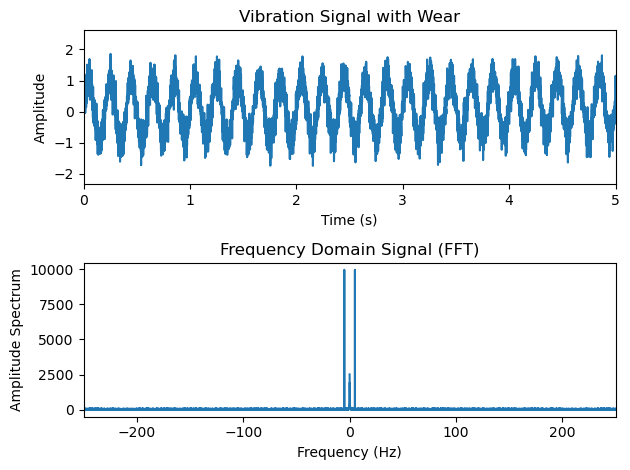

In [8]:
# Plot the time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t, vibration_signal)
plt.title("Vibration Signal with Wear")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 5)

# Plot the frequency-domain signal (FFT)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")
plt.xlim(-250, 250)

plt.tight_layout()
plt.show()

In the plot, we notice a central signal at 0, flanked by two mirrored symmetrical signals on the positive and negative sides. This indicates that our signal is comprised of a single distinct wave. Before delving into experiments, let’s first explore the concept of symmetry, and afterward, we can conduct experiments with various signals.

### Behind the scenes — FFT symmetry

What is happening on the backstage? We have some math and theoretical concepts. Let’s make it easy.

In many real-world scenarios, signals are composed of real numbers. In the time domain, these signals can be represented as a sequence of values. When you take the `FFT` of a real-valued signal, the resulting frequency spectrum is symmetric.

`Complex conjugate pairs` the symmetry comes from the fact that the `FFT` involves complex numbers. For every positive frequency component, there is a corresponding negative frequency component with the same magnitude. These pairs of frequencies are complex conjugates of each other.

`Mirrored information` The positive frequencies represent the information about how the signal oscillates in one direction, while the negative frequencies represent the same information but in the opposite direction. The `FFT` captures both directions, and that’s why the plot looks symmetrical

In summary, the symmetry in the `FFT` is a consequence of the mathematical properties of real-valued signals and complex numbers in the context of the `FFT`.

# Let’s start the next experiments

Now we understand the basic concepts of the `FFT`. Let’s simulate 2 signals with different parameters connected together

We will generate a second similar signal we will only focus on Frequency and amplitude:

In [9]:
# First Signal
frequency = 10
amplitude = 1

In [10]:
t1, vibration_signal_1 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [11]:
# Second Signal
frequency = 20
amplitude = 1

In [12]:
t2, vibration_signal_2 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [13]:
# Combine the signals just simply add them :)
combined_signal = vibration_signal_1 + vibration_signal_2

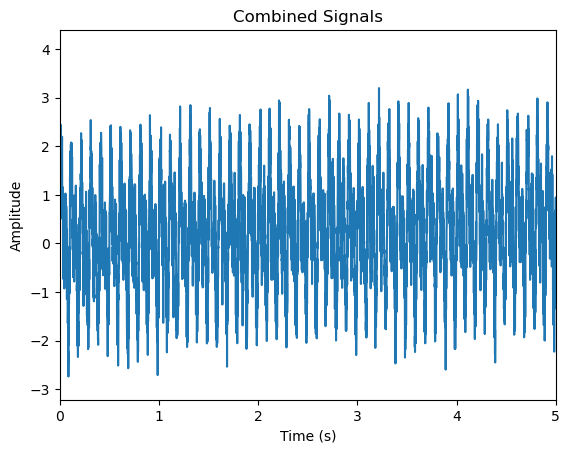

In [14]:
plt.plot(t2, combined_signal, label="Signal 1")
plt.title("Combined Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 5)
plt.show()

Now let’s make `FFT` and plot results:

In [15]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

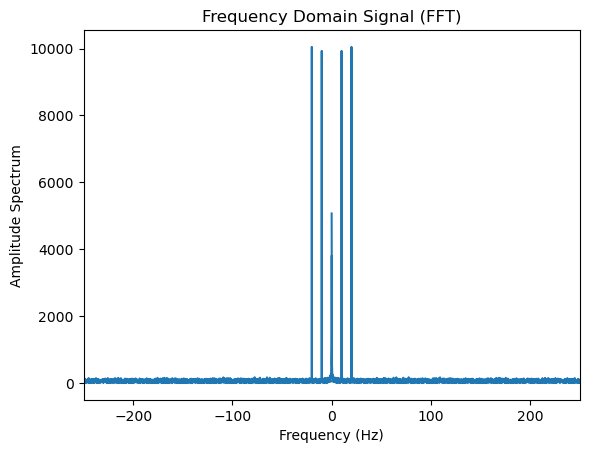

In [16]:
# Plot the frequency-domain signal (FFT)
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")
plt.xlim(-250, 250)
plt.show()

Now you can see we have the same amplitude height but 2 more signals equally offset. `First signal = 10Hz` `Second signal = 20Hz`

The X-axis position is adjusted for signal frequency. Let's introduce the third signal = 100 Hz and plot.

In [17]:
frequency = 100
amplitude = 1

In [18]:
t3, vibration_signal_3 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [19]:
# Combine the signals just simply add them :)
combined_signal = vibration_signal_1 + vibration_signal_2 + vibration_signal_3

In [20]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

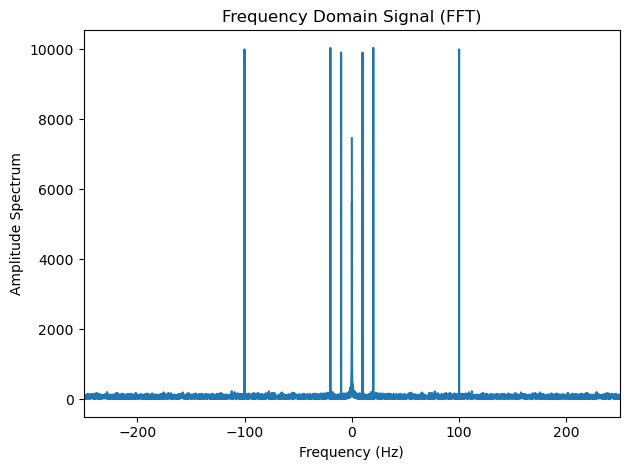

In [21]:
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")
plt.xlim(-250, 250)

plt.tight_layout()
plt.show()

As we can see our “new” signal is now much more offset due to the higher frequency value

What will happen if we add a fourth signal with a different amplitude

Make a new signal and plot it together

In [22]:
frequency = 150  # Just for make offset, now you know how it works
amplitude = 2

In [23]:
t4, vibration_signal_4 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [24]:
# Combine the signals
combined_signal = (
    vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4
)

In [25]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

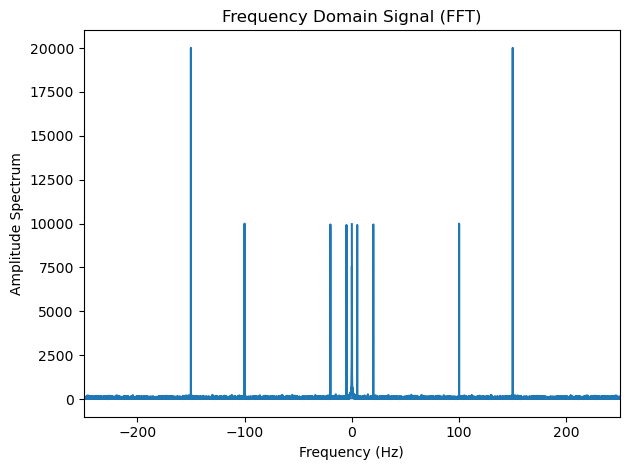

In [26]:
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")
plt.xlim(-250, 250)

plt.tight_layout()
plt.show()

Now you can see our Amplitude spectrum is twice higher due to amplitude values 1 and 2

# Power Spectral Density (PSD)

`PSD` is like taking a special snapshot of a signal and understanding how much power it has at different frequencies. It helps us see the energy distribution across the musical or vibration spectrum. We have 2 main `PSD` estimation methods, `Welch` and `Barlett`.

For the experiments, we will create a new combined signal just for the sake of clarity and improved visualization (not close frequency to see clear peaks)

In [27]:
frequency = 100
amplitude = 1
t5, vibration_signal_5 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [28]:
frequency = 200
amplitude = 1
t6, vibration_signal_6 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [29]:
frequency = 400
amplitude = 3
t7, vibration_signal_7 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [30]:
combined_signal2 = vibration_signal_5 + vibration_signal_6 + vibration_signal_7

### Welch Method

In [31]:
def welch_method(signal, segment_size=128, overlap=64):
    f, Pxx = plt.psd(signal, NFFT=segment_size, Fs=sampling_rate, noverlap=overlap)
    plt.title("Welch Method")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB)")
    plt.show()
    return f, Pxx

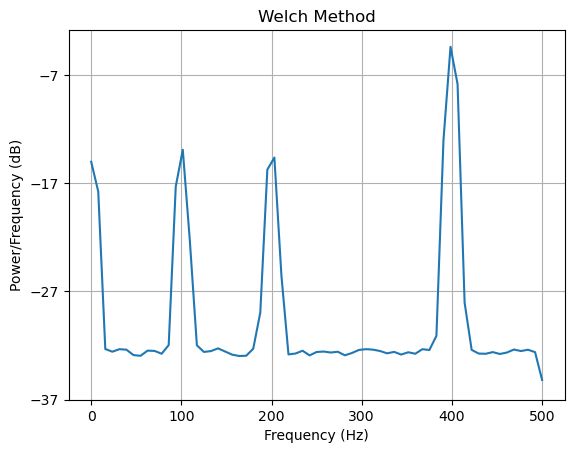

In [32]:
freq_welch, P_welch = welch_method(combined_signal2)

The Welch method divides the signal into overlapping segments and averages the periodograms. This approach provides a trade-off between accuracy and computational complexity. However, it may sacrifice frequency resolution for improved variance properties.

### Bartlett Method

`Bartlett method` is a specific case of the `Welch` method with no overlap between segments. While offering simplicity and reduced computational load, it shares a similar trade-off between accuracy and frequency resolution with the `Welch` method.

In [33]:
def bartlett_method(signal, segment_size=128):
    f, Pxx = plt.psd(
        signal, NFFT=segment_size, Fs=sampling_rate, window=np.bartlett(segment_size)
    )
    plt.title("Bartlett Method")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB)")
    plt.show()
    return f, Pxx

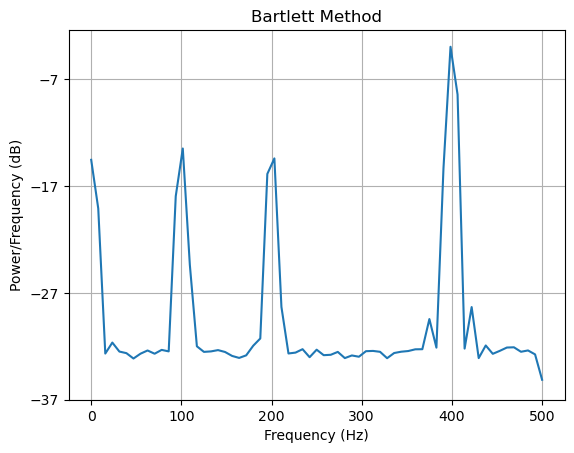

In [34]:
freq_bartlett, P_bartlett = bartlett_method(combined_signal2)

# Short-Time Fourier Transform (STFT) — windowing + FFT

### Why it is useful in predictive maintenance?

`STFT` analysis enables engineers to scrutinize the frequency components of signals, such as vibrations or acoustic emissions from machinery. The distinct frequency patterns associated with various faults or abnormalities allow for the early detection of potential issues, contributing to minimizing downtime and maintenance costs.

One of the primary advantages of `STFT` in predictive maintenance is its ability to identify fault signatures early on. This is particularly crucial as `STFT` can detect low-amplitude vibrations or subtle changes in signals, providing an early warning system that allows practitioners to address issues before they escalate.

Furthermore, `STFT` plays a pivotal role in distinguishing between normal and anomalous frequency patterns. By establishing baseline frequency spectra through a comparison of healthy and faulty equipment, engineers can efficiently identify deviations and signal impending problems, forming the foundation for effective predictive maintenance strategies.

### Let’s make some code

In [35]:
from scipy.signal import spectrogram

In [36]:
# Apply Short-Time Fourier Transform (STFT) to the combined signal
frequencies, times, Sxx = spectrogram(
    combined_signal, fs=sampling_rate, nperseg=256, noverlap=128
)

Woooh, just “one” line! Power of python. In this function, we have to play with 2 important parameters with funny names `nperseg` and `noverlap`.

`nperseg` (Number of Points per Segment).
This parameter determines the size of each time window or segment. A larger `nperseg` one results in better frequency resolution but poorer time resolution, and a smaller `nperseg` one provides better time resolution but poorer frequency resolution. In other words, it affects the trade-off between time and frequency resolution. In the example, `nperseg=256` it means that each time window is 256 points long.

`noverlap` (Number of Overlapping Points).
This parameter controls the overlap between consecutive time windows. Overlapping windows help in capturing the dynamic changes in the signal over time. If `noverlap` is set to a value less than `nperseg`, the windows overlap. In the example, `noverlap=128` means that each time window overlaps with the previous one by 128 points.

Let’s plot it

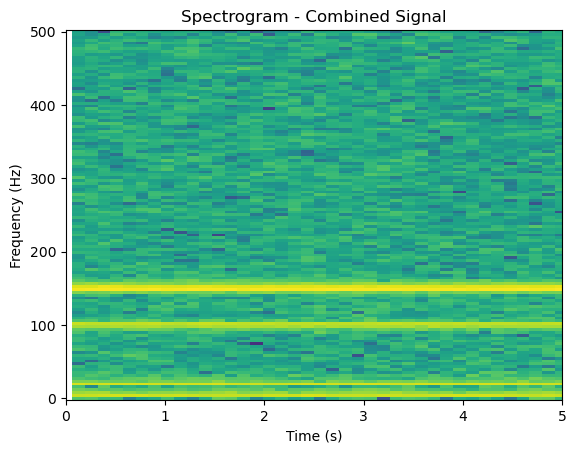

In [37]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading="auto")
plt.title("Spectrogram - Combined Signal")
plt.xlabel("Time (s)")
plt.xlim(0, 5)
plt.ylabel("Frequency (Hz)")
plt.show()

We have to use `Sxx` with basically is spectrogram output(`Sxx[i, j]`) We can easily spot our 4 signals combined together. The thicker the ribbon the higher the amplitude we have

`Spectogram Grid (Sxx)` Imagine a big grid like a piece of graph paper.

`Grid Rows (up and down)` Each row in the grid represents a different sound frequency, like high or low tones. Higher rows might represent high-pitched sounds, and lower rows could be for low-pitched sounds.

`Grid Columns (left to right)` Each column in the grid represents a different moment in time, like a snapshot. As you move from left to right, you’re looking at how the sound changes over time.

`Colors in the Grid` The colors in the grid tell you how loud or strong each frequency is at each moment. Bright colors might mean loud sounds and dull colors might mean quieter sounds.

### What will happen if one of our signals will be much stronger?

Let’s reframe the explanation in the context of predictive maintenance and simulate a scenario where we modify the fourth signal with a significantly higher amplitude, resembling a potential fault or anomaly in the machinery.

In [38]:
frequency = 150
amplitude = 20  # Increase it
t4, vibration_signal_4 = generate_vibration_signal(
    duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold
)

In [39]:
# Combine the signals
combined_signal = (
    vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4
)

In [40]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

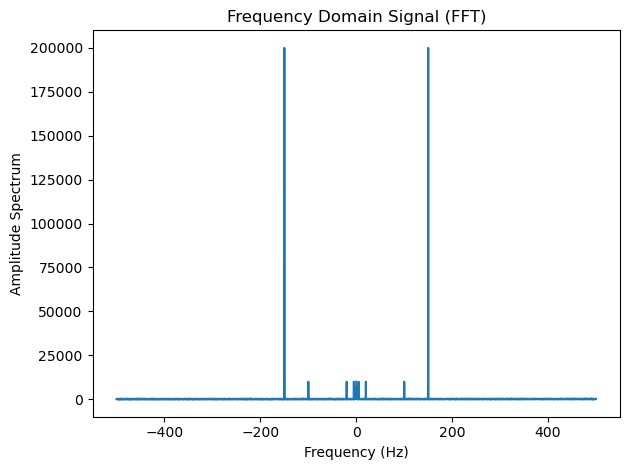

In [41]:
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude Spectrum")

plt.tight_layout()
plt.show()

Now, observe our new signal, which is significantly dominant. This doesn’t imply that the other signals have vanished, but their presence is overshadowed by the amplitude of the prominent signal, making them appear more like noise in comparison.

In [42]:
# Apply Short-Time Fourier Transform (STFT) to the combined signal
frequencies, times, Sxx = spectrogram(
    combined_signal, fs=sampling_rate, nperseg=256, noverlap=128
)

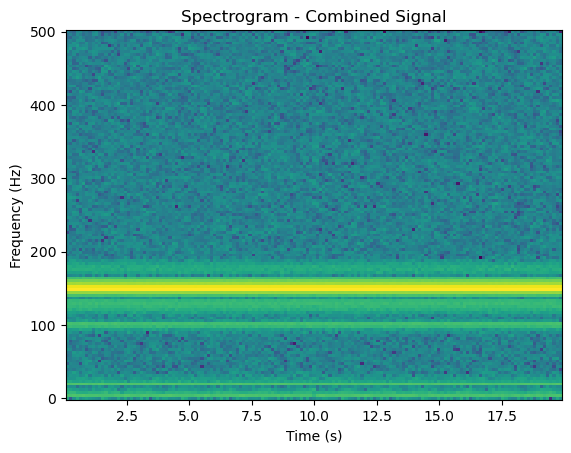

In [43]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.title('Spectrogram - Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In the spectrogram results, a conspicuous and intense line emerges, indicating a potential precursor to future machinery failure. In normal operational conditions, our machinery produces a background spectrum. However, as wear and tear progress or a component is on the verge of failure, deviations from this normal state become noticeable. To delve deeper into this, we might explore training a Convolutional Neural Network (CNN) to analyze these spectral patterns and identify distinctive signatures associated with impending failures. After the articles about feature engineering, I am going to start the modeling series.